In [38]:
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

In [39]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [40]:
#responses = pd.read_csv("freeformResponses.csv")
df_responses = pd.read_csv("kaggle-survey-2017\multipleChoiceResponses.csv",encoding='ISO-8859-1')
df_responses

C:\Users\ghami\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (31,83,86,87,98,99,109,116,123,124,127,129,130,164) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Male,Brazil,46.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Male,United States,35.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Female,India,22.0,Employed full-time,NaN,NaN,No,Yes,Software Developer/Software Engineer,Fine,...,Very Important,Somewhat important,Very Important,Somewhat important,Somewhat important,Not important,Very Important,Very Important,Somewhat important,Somewhat important
8,Female,Australia,43.0,Employed full-time,NaN,NaN,Yes,NaN,Business Analyst,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Male,Russia,33.0,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df_responses.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [42]:
df_responses.shape

(16716, 228)

# 1. DEMOGRAPHICS

## a) GENDER DISTRIBUTION 

<Figure size 576x576 with 0 Axes>

([<matplotlib.patches.Wedge at 0x2818cbd9e10>,
 [Text(-0.926613,0.59278,'Male'),
  Text(0.899617,-0.633,'Female'),
  Text(1.09815,-0.0637943,'A different identity'),
  Text(1.09989,-0.0153854,'Non-binary, genderqueer, or gender non-conforming')],
 [Text(-0.505425,0.323334,'81.9%'),
  Text(0.4907,-0.345273,'16.7%'),
  Text(0.59899,-0.0347969,'1.0%'),
  Text(0.599941,-0.00839206,'0.4%')])

Text(0.5,1,'Gender Distribution')

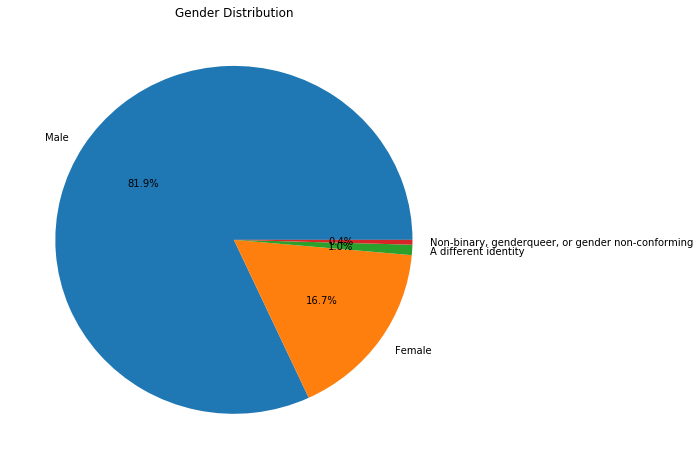

Proportion of women in this survey: 16.71% 
Proportion of men in this survey: 81.88% 


In [43]:

plt.figure(figsize=(8,8))
gender=df_responses['GenderSelect'].value_counts()
plt.pie(gender,labels=gender.index,autopct='%.1f%%')
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
plt.title('Gender Distribution')

plt.show()
print('Proportion of women in this survey: {:0.2f}% '.format(100*len(df_responses[df_responses['GenderSelect']=='Female'])/len(df_responses['GenderSelect'].dropna())))
print('Proportion of men in this survey: {:0.2f}% '.format(100*len(df_responses[df_responses['GenderSelect']=='Male'])/len(df_responses['GenderSelect'].dropna())))

# b) AGE

<Figure size 1080x576 with 0 Axes>

Text(0.5,1,'Age boxplot')

Text(0,0.5,'Age')

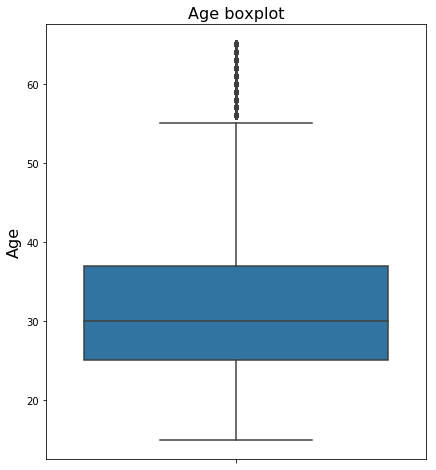

In [44]:
age=df_responses[(df_responses['Age']>=15) & (df_responses['Age']<=65) ]
age_series=df_responses['Age'].value_counts()
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.boxplot( y=age['Age'],data=age)
plt.title("Age boxplot", fontsize=16)
plt.ylabel("Age", fontsize=16)

plt.show()

# c) Country Distributions

<Figure size 720x720 with 0 Axes>

Text(0.5,1,'Country Distributions')

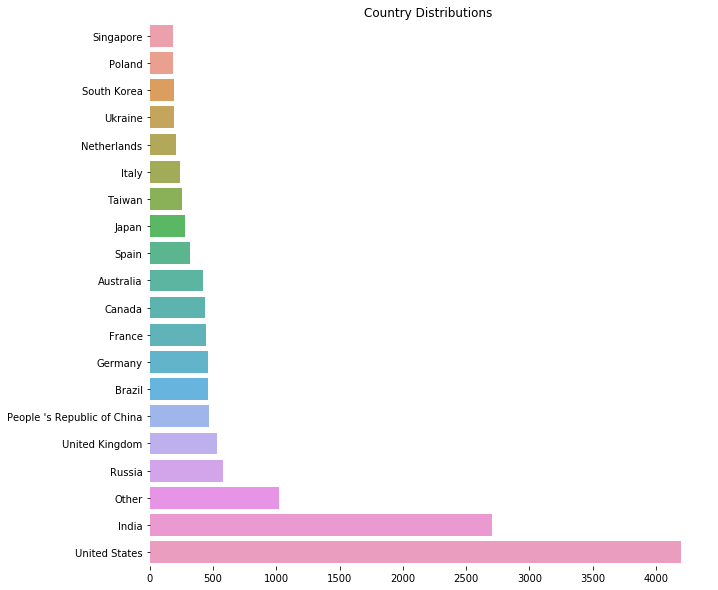

25.11% of the instances are Americans
16.18% of the instances are Indians
31.10% of the instances are contributed by top 5 countries


In [45]:
#import seaborn as sns
country=df_responses['Country'].value_counts().sort_values().tail(20)
plt.figure(figsize=(10,10))
sns.barplot(y=country.index, x=country.values,alpha=0.9)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.title('Country Distributions')
plt.show();
top_5=0
for i in [1,2,4,5,6]:
    top_5=top_5+country.sort_values(ascending=False)[i]
top_5=100*(top_5/len(df_responses))
print('{:0.2f}% of the instances are Americans'.format(100*len(df_responses[df_responses['Country']=='United States'])/len(df_responses)))
print('{:0.2f}% of the instances are Indians'.format(100*len(df_responses[df_responses['Country']=='India'])/len(df_responses)))
print('{:0.2f}% of the instances are contributed by top 5 countries'.format(top_5))

# d) Education

# Highest Formal Education

<Figure size 720x720 with 0 Axes>

([<matplotlib.patches.Wedge at 0x28185966390>,
 [Text(1.09942,0.0355712,'I prefer not to answer'),
  Text(1.08646,0.172039,'I did not complete any formal education past high school'),
  Text(1.00818,0.439959,'Professional degree'),
  Text(0.720998,0.830759,"Some college/university study without earning a bachelor's degree"),
  Text(-0.439597,1.00834,'Doctoral degree'),
  Text(-0.17321,-1.08628,"Bachelor's degree")],
 [Text(0.599686,0.0194025,'1.0%'),
  Text(0.592616,0.0938394,'2.9%'),
  Text(0.549919,0.239978,'5.2%'),
  Text(0.393272,0.453142,'9.0%'),
  Text(-0.23978,0.550005,'26.8%'),
  Text(-0.0944782,-0.592515,'55.0%')])

Text(0.5,1,'Highest Degree achieved by the participants')

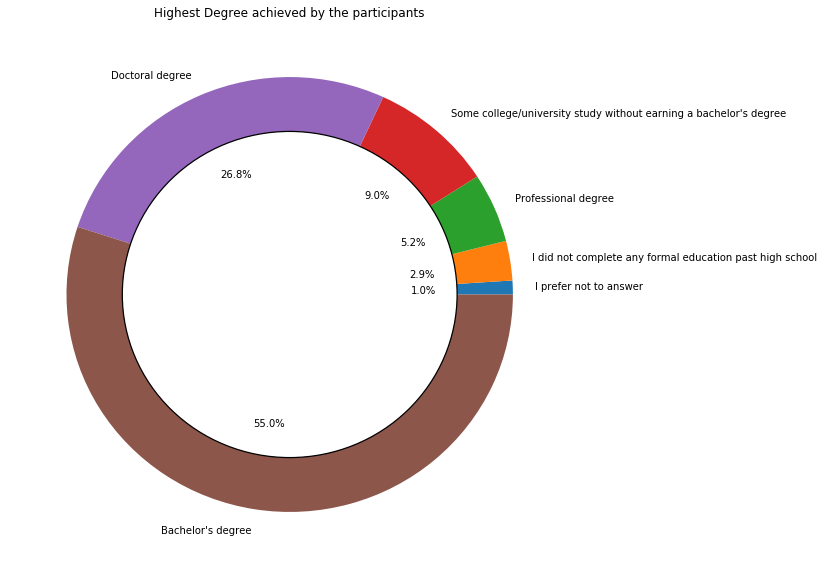

In [46]:

education=df_responses['FormalEducation'].value_counts().sort_values()[:6]
plt.figure(figsize=(10,10))
plt.pie(x=education,labels=education.index,autopct='%.1f%%')
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Highest Degree achieved by the participants')
plt.show()

# Degree Majored in

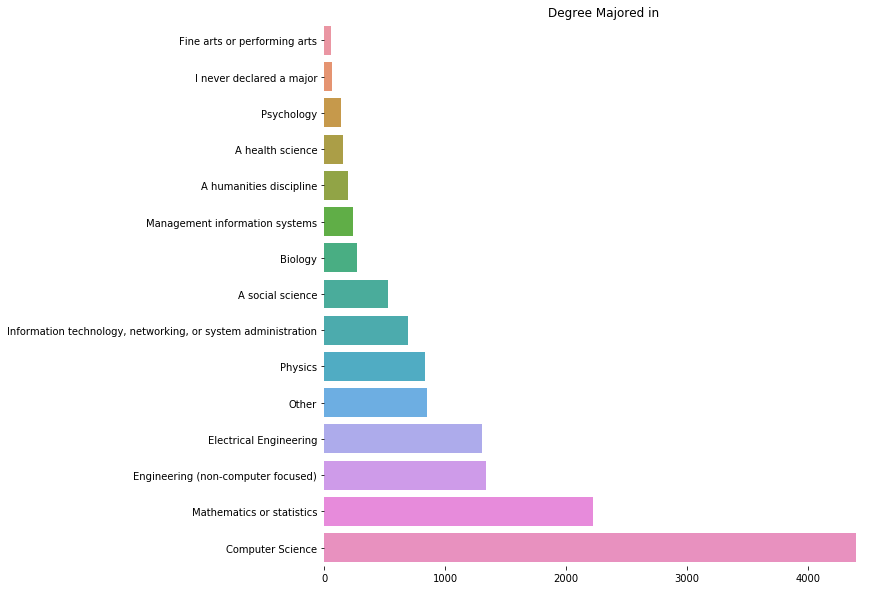

In [47]:
major=df_responses['MajorSelect'].value_counts().sort_values(ascending=True)
major
plt.figure(figsize=(10,10))
sns.barplot(x=major.values,y=major.index)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.title('Degree Majored in')
plt.show();

# Market share of different learning platforms

<Figure size 720x720 with 0 Axes>

([<matplotlib.patches.Wedge at 0x2818b08dbe0>,
 [Text(0.467788,0.995578,'Online courses (coursera, udemy, edx, etc.)'),
  Text(-1.09994,-0.0112747,'University courses'),
  Text(0.129128,-1.09239,'Self-taught'),
  Text(0.9894,-0.480716,'Work'),
  Text(1.08314,-0.191861,'Other'),
  Text(1.09834,-0.0603374,'Kaggle competitions')],
 [Text(0.255157,0.543042,'36.0%'),
  Text(-0.599968,-0.00614982,'28.3%'),
  Text(0.0704333,-0.595852,'25.1%'),
  Text(0.539673,-0.262209,'6.7%'),
  Text(0.590803,-0.104652,'2.1%'),
  Text(0.599097,-0.0329113,'1.7%')])

Text(0.5,1,'Market share of different learning platforms')

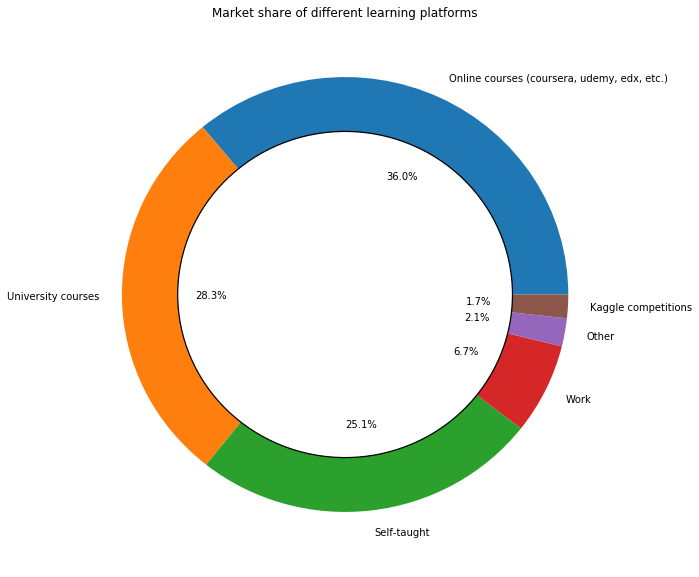

In [48]:

informal=df_responses['FirstTrainingSelect'].value_counts()
#informal
plt.figure(figsize=(10,10))
plt.pie(x=informal.values,labels=informal.index,autopct='%1.1f%%')
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Market share of different learning platforms')

plt.show()

# e) Employment Status

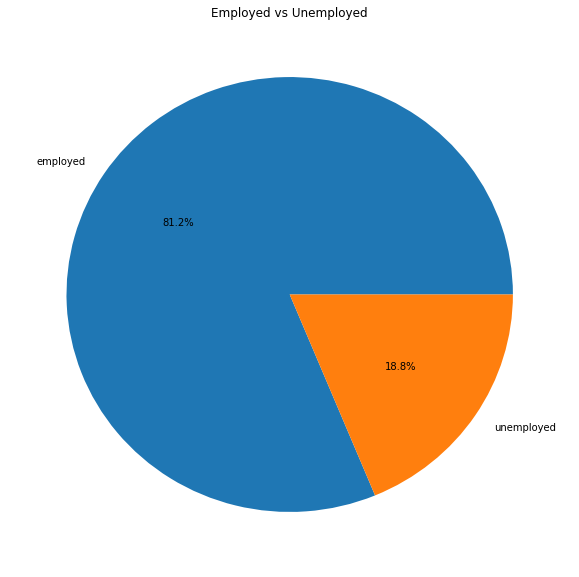

In [33]:

employment=df_responses['EmploymentStatus'].value_counts()
employment_df=pd.DataFrame(employment)
n_employed= employment[0]+employment[2]+employment[4]
n_unemployed=employment[1]+employment[3]
x=[n_employed,n_unemployed]
plt.figure(figsize=(10,10))
plt.pie(x=x,labels=['employed','unemployed'],autopct='%1.1f%%')
plt.title("Employed vs Unemployed")
plt.show();

# Jobs in high demand

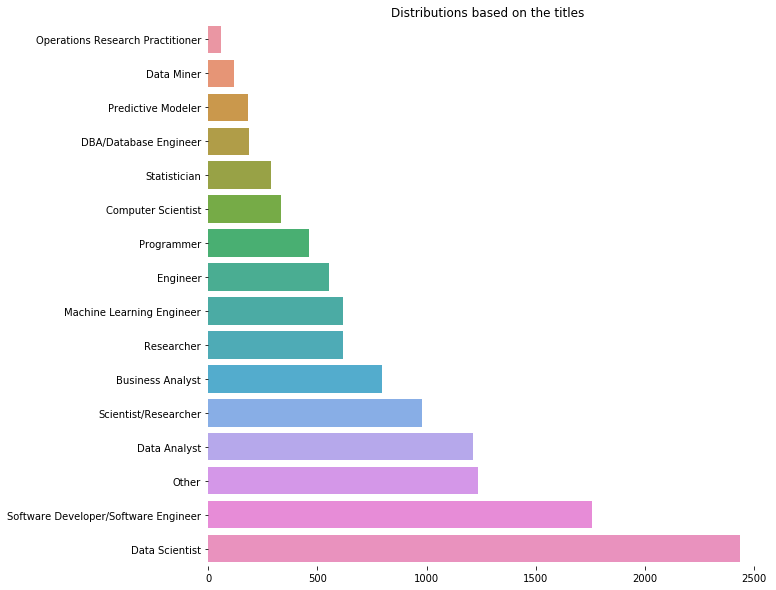

In [49]:

title=df_responses['CurrentJobTitleSelect'].value_counts().sort_values(ascending=True)
plt.figure(figsize=(10,10))
sns.barplot(x=title.values,y=title.index)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.title('Distributions based on the titles')
plt.show();

# People willing to change job

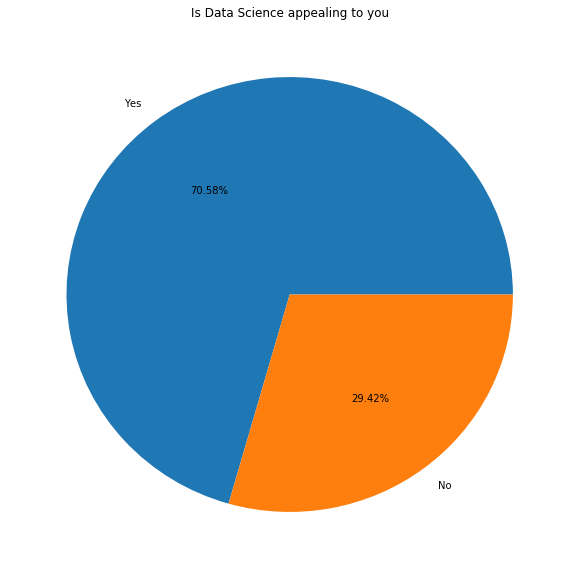

In [51]:
change = df_responses['CareerSwitcher'].value_counts()
plt.figure(figsize=(10,10))
plt.pie(change,labels=change.index,autopct='%1.2f%%')
plt.title('Is Data Science appealing to you')
plt.show();